# Day 8

## part 1

- connect junction boxes together that are as close as possible (straight line distance)
- repeat this until all junction boxes are connected in some fashion(skipping already connected boxes)
- there may be multiple circuits
- the solution is the product of the size of the circuits
- do this for the first 1000 shortest connections


In [383]:
from copy import deepcopy
from dataclasses import dataclass
import logging
from pathlib import Path

from tqdm import tqdm
from matplotlib import pyplot as plt

from advent_of_code_utils.advent_of_code_utils import (
    parse_from_file,
    ParseConfig as PC,
    markdown,
    plot_str_grid,
)

log = logging.getLogger("advent")
logging.basicConfig(level=logging.INFO)

In [384]:
# ok so this should be fairly simple once we have the infrastructure in place

@dataclass
class P3:
    x: int
    y: int
    z: int

    def parser(xyz_string: str) -> "P3":
        "for loading in from puzzle input"
        return P3(*[int(v) for v in xyz_string.split(",")])
    
    def __neg__(self) -> "P3":
        return P3(-self.x, -self.y, -self.z)

    def __add__(self, other: "P3") -> "P3":
        return P3(
            self.x + other.x,
            self.y + other.y,
            self.z + other.z,
        )

    def __sub__(self, other: "P3") -> "P3":
        return (self + (-other))
    
    def mag(self) -> "P3":
        return (self.x ** 2 + self.y ** 2 + self.z ** 2) ** 0.5

    def __eq__(self, other: "P3") -> bool:
        return (
            self.x == other.x and
            self.y == other.y and
            self.z == self.z
        )

    def __hash__(self) -> int:
        return hash((self.x, self.y, self.z))

a = P3(1, 1, 1)
b = P3(2, 3, 4)
print(a + b)
print(a - b)
print(a.mag())
print(3 ** (1/2))

P3(x=3, y=4, z=5)
P3(x=-1, y=-2, z=-3)
1.7320508075688772
1.7320508075688772


In [385]:
parser = PC("\n", P3.parser)
filepath = Path("day_8_example.txt")
points = parse_from_file(filepath, parser)

INFO:advent_of_code_utils.py:20 items loaded from "day_8_example.txt"


Text(0.5, 1.0, 'From the top...')

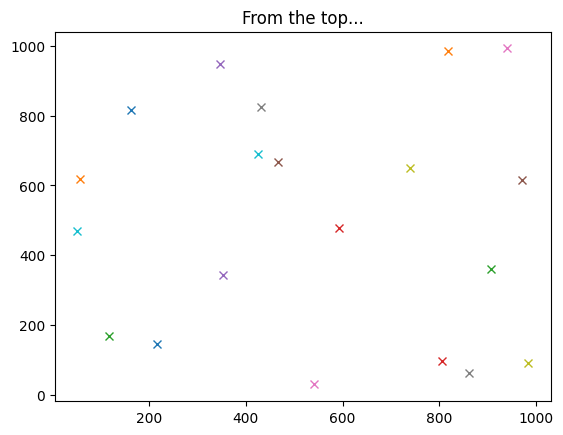

In [386]:
fig, ax = plt.subplots()
for point in points:
    ax.plot(
        point.x, point.y, marker="x", linestyle=" "
    )
ax.set_title("From the top...")

In [387]:
# first lets find each point's distance to it's nearest neighbours
r_limit = 10e3

neighbours = {}
for point in tqdm(points, desc=f"finding neighbours (<{r_limit})"):
    neighbours.update({point: list()})
    for other in points:
        # skip this point
        if other == point:
            continue
        # skip points too far away
        elif (other - point).mag() > r_limit:
            continue
        
        # else add the other point
        neighbours[point].append(other)

finding neighbours (<10000.0): 100%|██████████| 20/20 [00:00<00:00, 6749.22it/s]


In [ ]:
connections = 0
circuits = []
conn_limit = 1000
if "example" in filepath.name:
    conn_limit = 10

while True:
    # go through each set of neighbours and the minimum distance
    closest_pair = None
    pair_dist = None
    for point, others in neighbours.items():
        for other in others:
            distance = (point - other).mag()
            if pair_dist is None:
                closest_pair = point, other
                pair_dist = distance
            elif distance < pair_dist:
                closest_pair = point, other
                pair_dist = distance
    
    # then remove them from each other's lists to avoid re-picking
    if other in neighbours[point]:
        neighbours[point].remove(other)
    if point in neighbours[other]:
        neighbours[other].remove(point)

    # now check whether either is in a circuit
    point, other = closest_pair

    for circuit_p in circuits:
        if point in circuit_p:
            break
    else:
        circuit_p = None
    
    for circuit_o in circuits:
        if other in circuit_o:
            break
    else:
        circuit_o = None
    
    # neither are in a circuit - create new
    if circuit_p is None and circuit_o is None:
        circuits.append([point, other])
    # only point is in a circuit  - add other
    elif circuit_o is None:
        circuit_p.append(other)
    # only other is in a circuit - add point
    elif circuit_p is None:
        circuit_o.append(point)
    # both are in separate circuits - merge circuits
    elif circuit_p != circuit_o:
        circuits.remove(circuit_p)
        circuit_o.extend(circuit_p)
    # both are in the same circuit - pass
    else:
        continue

    connections += 1
    print(f"{connections=}/{conn_limit}", end="\r")
    # print([len(c) for c in circuits], end="\r")
    if connections == conn_limit:
        break

removed other
removed point
removed other/10
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point
removed other
removed point


KeyboardInterrupt: 

In [ ]:
print([len(c) for c in circuits])

[2]
